In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## The Spectral radiance per wavelength function

In [2]:
def spectral_radiance(Lambda, T, h, c, Kb):
    return (2 * h * c**2) / ((Lambda**5) * (np.exp(h * c / (Lambda * Kb * T)) - 1))

Defining a function which takes the filename as input and returns arrays of x and y values 

In [3]:
def data(filename: str):
    x = []
    y = []
    with open(filename, "r") as file:
        data = file.readlines()
        for i in data:
            x.append(float(i.split(",")[0]))
            y.append(float(i.split(",")[1].strip()))
    return x, y

## Plot of d1.txt 

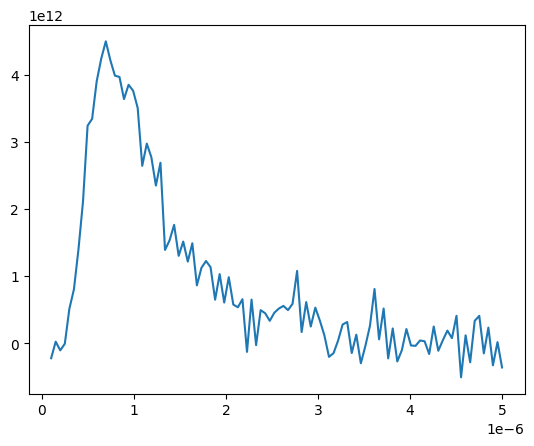

In [5]:
x, y = data("d1.txt")
plt.figure
plt.plot(x, y)

## Plot of d2.txt

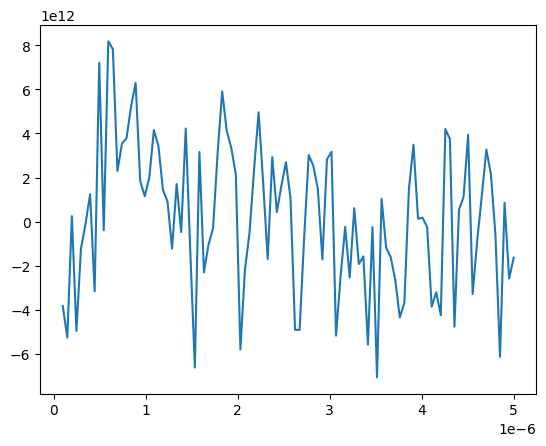

In [6]:
x, y = data("d2.txt")
plt.figure
plt.plot(x, y)

## Plot of d3.txt

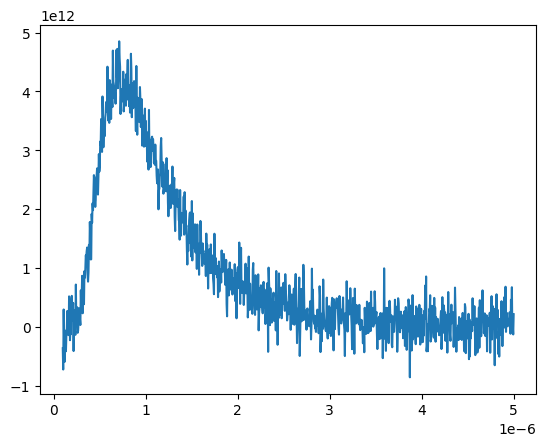

In [7]:
x, y = data("d3.txt")
plt.figure
plt.plot(x, y)

## Plot of d4.txt

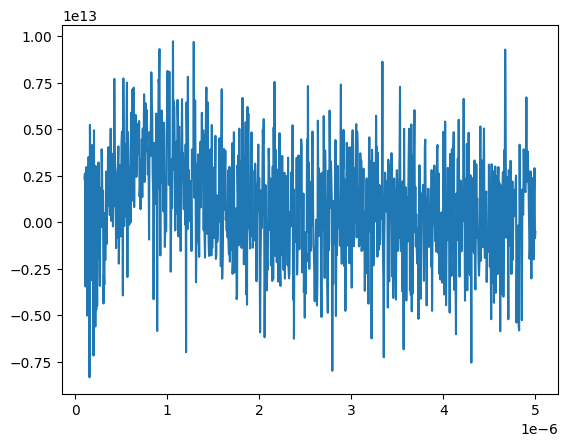

In [8]:
x, y = data("d4.txt")
plt.figure
plt.plot(x, y)

# All parameters variable

Initially fixing nothing and just observing the values aobtained from the curve fit by initialising some random values for all the parameters

In [9]:
p0 = np.array([500, 1e-20, 1e8, 1e-10])

[6.30553387e+00 2.09449897e-20 5.22507872e+01 4.86211332e-14]


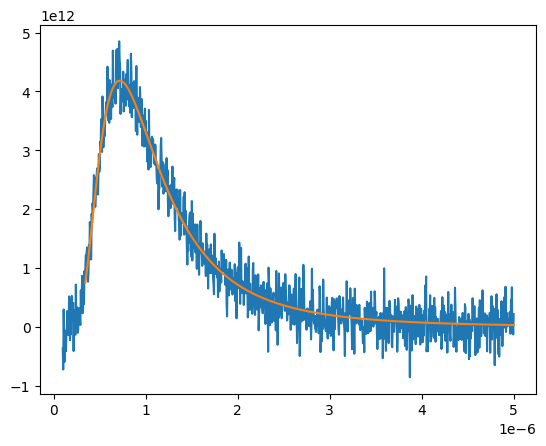

In [10]:
def fitcurve(in_file, arr, func):
    x = []
    y = []
    with open(in_file, "r") as file:
        data = file.readlines()
        for i in data:
            x.append(float(i.split(",")[0]))
            y.append(float(i.split(",")[1].strip()))
    params, params_covariance = sp.optimize.curve_fit(func, x[100:], y[100:], p0=arr)
    plt.plot(x, y)
    plt.plot(x[50:], func(np.array(x[50:]), *params))

    return params


params = fitcurve("d3.txt", p0, spectral_radiance)
print(params)

# Fixing Parameters one at a time

Fixing planck's constant, speed of light and Boltzmann constant and keeping Temperature as variable

[4010.74561071]


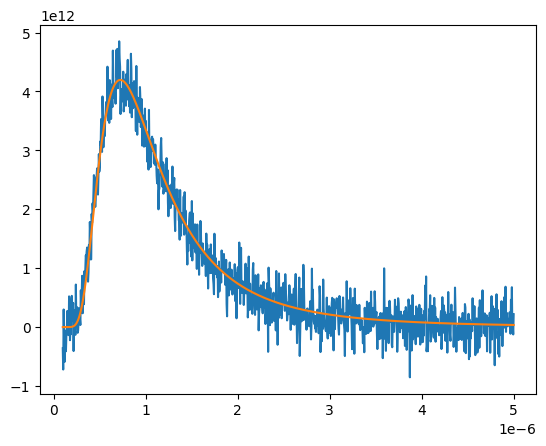

In [11]:
fixparams = np.array([6.64 * 1e-34, 3 * 1e8, 1.38e-23])


def newFun(Ld, T):
    return spectral_radiance(Ld, T, *fixparams)


x, y = data("d3.txt")
params, params_covariance = sp.optimize.curve_fit(newFun, x, y, p0=[6000])
plt.plot(x, y)
plt.plot(x, newFun(np.array(x), *params))
print(params)

Fixing planck's constant, Temperature and Boltzmann constant and keeping speed of light as variable

[3.00211201e+08]


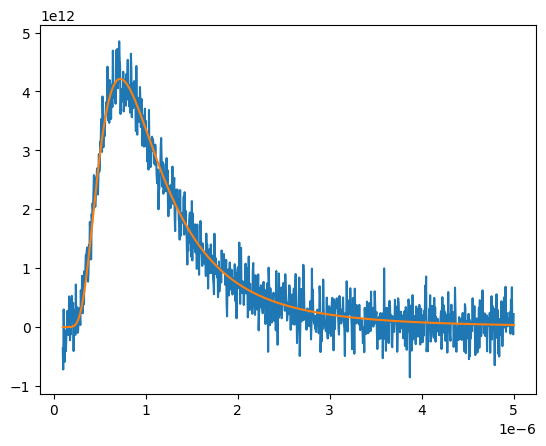

In [12]:
fixparams = np.array([4010.74, 6.63e-34, 1.38e-23])


def newFun(Ld, c):
    T = fixparams[0]
    h = fixparams[1]
    Kb = fixparams[2]
    return spectral_radiance(Ld, T, h, c, Kb)


x, y = data("d3.txt")
params, params_covariance = sp.optimize.curve_fit(newFun, x, y, p0=[1e9])
plt.plot(x, y)
plt.plot(x, newFun(np.array(x), *params))
print(params)

Fixing Temperature, speed of light and  Boltzmann constant and keeping planck's constant as variable

[6.63756436e-34]


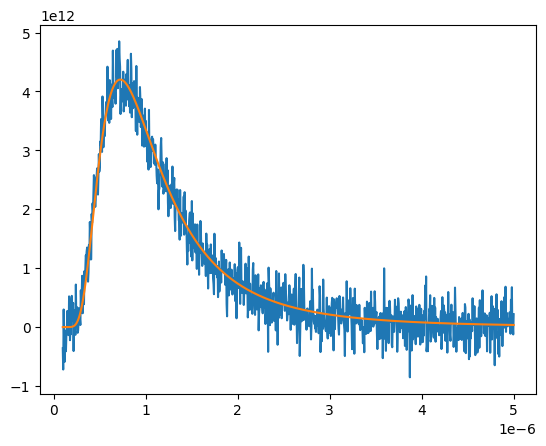

In [13]:
fixparams = np.array([4010.74, 3e8, 1.38e-23])


def newFun(Ld, h):
    T = fixparams[0]
    c = fixparams[1]
    Kb = fixparams[2]
    return spectral_radiance(Ld, T, h, c, Kb)


x, y = data("d3.txt")
params, params_covariance = sp.optimize.curve_fit(newFun, x, y, p0=[1e-35])
plt.plot(x, y)
plt.plot(x, newFun(np.array(x), *params))
print(params)

Fixing Temperature, speed of light , Planck's constant and keeping Boltzmann's constant as variable

[1.37834415e-23]


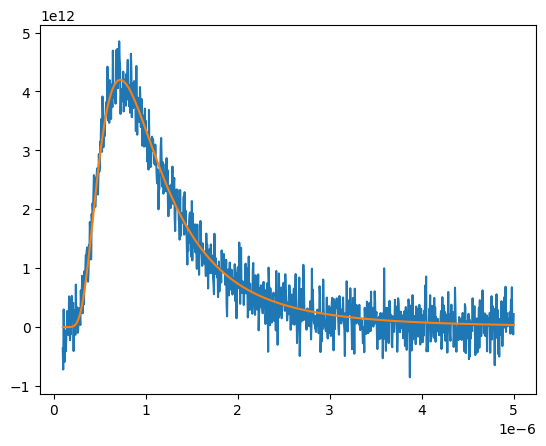

In [14]:
fixparams = np.array([4010.74, 3e8, 6.63e-34])


def newFun(Ld, Kb):
    T = fixparams[0]
    c = fixparams[1]
    h = fixparams[2]
    return spectral_radiance(Ld, T, h, c, Kb)


x, y = data("d3.txt")
params, params_covariance = sp.optimize.curve_fit(newFun, x, y, p0=[1e-24])
plt.plot(x, y)
plt.plot(x, newFun(np.array(x), *params))
print(params)